In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("data.xlsx")
df.head()


,CNT,ST004D01T,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY
0,AUS,1,1.3151,1.50,0.59,0.42,11,9,2.2767,1.1953,1.1793,2.3106,1.8669,2.0345,1.3140,1.8202,2.0165,0.6402,0.8980,0.5464
1,AUS,2,1.3151,1.50,-0.18,1.33,9,7,1.2442,2.0078,1.1793,0.4222,0.0595,1.0294,-0.6262,-0.5066,0.5121,0.2127,0.5135,0.4572
2,AUS,1,1.3152,0.80,0.98,0.42,9,4,1.2414,1.9141,1.1793,0.2830,0.333,-2.0985,0.0297,-0.4616,0.7743,1.0346,-0.2336,-0.1687
3,AUS,1,1.3152,-0.25,0.59,0.87,11,8,1.7578,1.5917,1.1793,1.0705,2.6563,0.4922,-0.8998,-1.0493,0.2012,1.0346,0.0236,-0.1716
4,AUS,2,1.3152,-0.25,0.59,1.33,8,9,1.2395,1.3941,1.1793,1.0975,0.3692,0.3529,1.3140,0.6532,0.9044,-0.6576,-0.2336,1.3230


In [92]:
# ICTSCH değişkeni için ortalama değerimizi hesapladık.

df["ICTSCH"].mean()

6.484499629964641

In [93]:
# 6.48 sayısını tam sayı olarak 6 kabul ettik ve 6 dan büyük olan değerler 1 küçük olan değerleri 0 olarak güncelledik.

df["ICTSCH"] = np.where(df["ICTSCH"] > 6, 1, 0)
df.head()

,CNT,ST004D01T,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY
0,AUS,1,1.3151,1.50,0.59,0.42,11,1,2.2767,1.1953,1.1793,2.3106,1.8669,2.0345,1.3140,1.8202,2.0165,0.6402,0.8980,0.5464
1,AUS,2,1.3151,1.50,-0.18,1.33,9,1,1.2442,2.0078,1.1793,0.4222,0.0595,1.0294,-0.6262,-0.5066,0.5121,0.2127,0.5135,0.4572
2,AUS,1,1.3152,0.80,0.98,0.42,9,0,1.2414,1.9141,1.1793,0.2830,0.333,-2.0985,0.0297,-0.4616,0.7743,1.0346,-0.2336,-0.1687
3,AUS,1,1.3152,-0.25,0.59,0.87,11,1,1.7578,1.5917,1.1793,1.0705,2.6563,0.4922,-0.8998,-1.0493,0.2012,1.0346,0.0236,-0.1716
4,AUS,2,1.3152,-0.25,0.59,1.33,8,1,1.2395,1.3941,1.1793,1.0975,0.3692,0.3529,1.3140,0.6532,0.9044,-0.6576,-0.2336,1.3230


In [94]:
# ICTSCH sütunumuzu eski değerleri yerine 1 ve 0 olarak güncelledik.

df.to_excel("data2.xlsx")

In [95]:
# 1 ve 0 olarak güncellenen yeni datamızı data2 olarak kaydedip df_hazir değişkenine atadık. Bundan sonra logistic regresyonumuz bu dataframe üzerinden gerçekleşecek.

df_hazir = pd.read_excel("data2.xlsx")
df_hazir.head()

,Unnamed: 0,CNT,ST004D01T,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,...,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY
0,0,AUS,1,1.3151,1.50,0.59,0.42,11,1,2.2767,...,1.1793,2.3106,1.8669,2.0345,1.3140,1.8202,2.0165,0.6402,0.8980,0.5464
1,1,AUS,2,1.3151,1.50,-0.18,1.33,9,1,1.2442,...,1.1793,0.4222,0.0595,1.0294,-0.6262,-0.5066,0.5121,0.2127,0.5135,0.4572
2,2,AUS,1,1.3152,0.80,0.98,0.42,9,0,1.2414,...,1.1793,0.2830,0.333,-2.0985,0.0297,-0.4616,0.7743,1.0346,-0.2336,-0.1687
3,3,AUS,1,1.3152,-0.25,0.59,0.87,11,1,1.7578,...,1.1793,1.0705,2.6563,0.4922,-0.8998,-1.0493,0.2012,1.0346,0.0236,-0.1716
4,4,AUS,2,1.3152,-0.25,0.59,1.33,8,1,1.2395,...,1.1793,1.0975,0.3692,0.3529,1.3140,0.6532,0.9044,-0.6576,-0.2336,1.3230


In [96]:
#  x= PERFEED, HEDRES, y= ICTSCH olacak şekilde logistic regression modeli kuralım

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_hazir[["PERFEED", "HEDRES"]]
y = df_hazir["ICTSCH"]

In [97]:
print(X)
print(y)

       PERFEED  HEDRES
0       2.0165  1.1793
1       0.5121  1.1793
2       0.7743  1.1793
3       0.2012  1.1793
4       0.9044  1.1793
...        ...     ...
12156  -0.3253  0.0477
12157   0.7743  1.1793
12158  -0.3253  1.1793
12159   0.7743  1.1793
12160  -0.3253  1.1793

[12161 rows x 2 columns]
0        1
1        1
2        0
3        1
4        1
        ..
12156    0
12157    0
12158    0
12159    0
12160    0
Name: ICTSCH, Length: 12161, dtype: int64


In [98]:
# Verilerimizi test ve train olmak üzere ayıralım.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
# Modelimizi kuralım

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [100]:
# Tahmin yapalım

y_pred = log_model.predict(X_test)

In [101]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 465, 1216],
       [ 407, 1561]])

In [102]:
# Tahmin doğruluğunu hesaplayalım

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.5552206083858592

In [103]:
# f1-score, precision ve recall için gerekli kütüphanelerimizi import edelim

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve

In [104]:
f1_score(y_test, y_pred)

0.6579557428872498

In [105]:
precision_score(y_test, y_pred)


0.5621173928700036

In [106]:
recall_score(y_test, y_pred)


0.7931910569105691

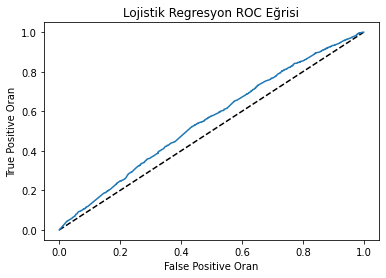

In [107]:
# ROC Curve

y_pred_proba = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel("False Positive Oran")
plt.ylabel("True Positive Oran")
plt.title("Lojistik Regresyon ROC Eğrisi")
plt.show()

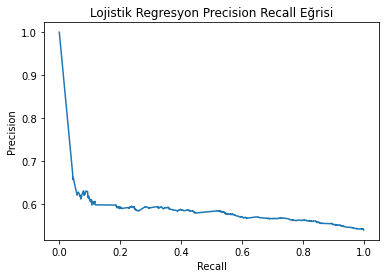

In [108]:
# Precision Recall Curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recalls, precisions, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Lojistik Regresyon Precision Recall Eğrisi")
plt.show()

In [ ]:
# GridSearchCV ile en iyi parametreleri bulalım.

from sklearn.model_selection import GridSearchCV

grid = {"C": np.logspace(-3,3,7), "penalty": ["l1", "l2"]}
log_model_cv = GridSearchCV(log_model, grid, cv=10)
log_model_cv.fit(X_train, y_train)

log_model_cv.best_params_

In [110]:
# En iyi parametrelerle modeli kuralım

log_model_tuned = LogisticRegression(C=0.1, penalty="l2")
log_model_tuned.fit(X_train, y_train)

# Tahmin yapalım

y_pred = log_model_tuned.predict(X_test)

# Confusion matrix

confusion_matrix(y_test, y_pred)

# Tahmin doğruluğunu hesaplayalım

accuracy_score(y_test, y_pred)

0.5549465607015621